In [8]:
from langchain_community.chat_models import ChatOpenAI
import json
from ragchat.doc_store import DocStore
from ragchat.configs import DB_NAME, COLLECTION_NAME

In [9]:
llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)

/home/dp/hdd/gits/hollywood-hooah/env/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%cd ..

/home/dp/hdd/gits/hollywood-hooah


In [4]:
ds=DocStore(db_name=DB_NAME, collection_name=COLLECTION_NAME,)

In [11]:
l_lens = []
c_lens = []
docs=[]
for doc_chunk in ds.yield_from_db(query={}, chunk_size=100):
    docs.extend(doc_chunk)
    for clean_text_dict in doc_chunk:
        cleaned = clean_text_dict["cleaned"]
        c_lens.append((llm.get_num_tokens(cleaned), clean_text_dict['path']))
        l_lens.append((len(cleaned.splitlines()), clean_text_dict['path']))

c_lens.sort()
l_lens.sort()


In [12]:
token_vals=[t[0] for t in c_lens]


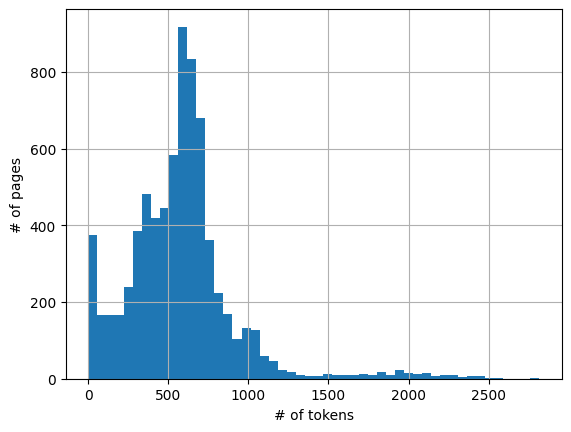

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pd.Series(token_vals).hist(bins=50,ax=ax)
ax.set_xlabel("# of tokens")
ax.set_ylabel("# of pages")
# ax.set_title('page-level')
# ax.set_title('tokens per page')
fig.savefig('notebooks/images/' + 'tokens per page'.replace(' ','_') + '.png')